In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import normalize

file_path = 'Train_v1.txt'
column_names = ['toRemove', 'isSarcastic', 'text']

# Read the dataset
dataset = pd.read_csv(file_path, sep='\t', header=None, names=column_names)

In [2]:
import text_mining_utils as tmu

In [48]:
dataset.count()

toRemove       39780
isSarcastic    39780
text           39780
dtype: int64

In [17]:
import pandas as pd

# Assuming 'dataset' is your DataFrame
# Shuffle the dataset
dataset_shuffled = dataset.sample(frac=1, random_state=42)

data_sample = len(dataset) // 2

# Take the first quarter of the shuffled dataset
dataset = dataset_shuffled.iloc[:data_sample]

# Now, quarter_dataset contains a representative 1/4 subset of your original dataset


total_rows = len(dataset)
print(total_rows)

19890


In [18]:
class_distribution = y = dataset['isSarcastic'].value_counts()
print(class_distribution)

isSarcastic
0    10633
1     9257
Name: count, dtype: int64


isSarcastic
0    2684
1    2288
Name: count, dtype: int64

In [9]:
baseline_count_matrix = tmu.build_count_matrix(dataset.text)
baseline_count_matrix.head()

,!,"""",#,$,%,&,',(,),*,...,󾌧,󾌮,󾌴,󾌸,󾍀,󾍃,󾓤,󾭻,󾮗,󾮚
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
baseline_tf_matrix = tmu.build_tf_matrix(dataset.text)
baseline_tf_matrix.head()

,!,"""",#,$,%,&,',(,),*,...,󾌧,󾌮,󾌴,󾌸,󾍀,󾍃,󾓤,󾭻,󾮗,󾮚
0,0.071429,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.055556,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
baseline_tfidf_matrix = tmu.build_tfidf_matrix(dataset.text)
baseline_tfidf_matrix.head()

,!,"""",#,$,%,&,',(,),*,...,󾌧,󾌮,󾌴,󾌸,󾍀,󾍃,󾓤,󾭻,󾮗,󾮚
0,0.145916,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.124995,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.084026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#baseline model preformace
from sklearn.svm import SVC

clf = SVC(random_state=1)
y = dataset.isSarcastic

tmu.printClassifReport(clf, baseline_count_matrix, y)
tmu.printClassifReport(clf, baseline_tf_matrix, y)
tmu.printClassifReport(clf, baseline_tfidf_matrix, y)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2684
           1       0.99      1.00      1.00      2288

    accuracy                           1.00      4972
   macro avg       1.00      1.00      1.00      4972
weighted avg       1.00      1.00      1.00      4972

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2684
           1       1.00      0.99      1.00      2288

    accuracy                           1.00      4972
   macro avg       1.00      1.00      1.00      4972
weighted avg       1.00      1.00      1.00      4972

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2684
           1       0.98      0.99      0.98      2288

    accuracy                           0.99      4972
   macro avg       0.99      0.99      0.99      4972
weighted avg       0.99      0.99      0.99      4972



8th of dataset

          precision    recall  f1-score   support

           0       1.00      0.99      1.00      2684
           1       0.99      1.00      1.00      2288

    accuracy                           1.00      4972
   macro avg       1.00      1.00      1.00      4972
weighted avg       1.00      1.00      1.00      4972

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2684
           1       1.00      0.99      1.00      2288

    accuracy                           1.00      4972
   macro avg       1.00      1.00      1.00      4972
weighted avg       1.00      1.00      1.00      4972

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2684
           1       0.98      0.99      0.98      2288

    accuracy                           0.99      4972
   macro avg       0.99      0.99      0.99      4972
weighted avg       0.99      0.99      0.99      4972

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=1)

y = dataset.isSarcastic

tmu.printClassifReport(dt_clf, baseline_count_matrix, y)
tmu.printClassifReport(dt_clf, baseline_tf_matrix, y)
tmu.printClassifReport(dt_clf, baseline_tfidf_matrix, y)

              precision    recall  f1-score   support

           0       0.73      0.74      0.73     10633
           1       0.70      0.68      0.69      9257

    accuracy                           0.71     19890
   macro avg       0.71      0.71      0.71     19890
weighted avg       0.71      0.71      0.71     19890

              precision    recall  f1-score   support

           0       0.71      0.73      0.72     10633
           1       0.68      0.66      0.67      9257

    accuracy                           0.69     19890
   macro avg       0.69      0.69      0.69     19890
weighted avg       0.69      0.69      0.69     19890

              precision    recall  f1-score   support

           0       0.71      0.72      0.71     10633
           1       0.67      0.66      0.66      9257

    accuracy                           0.69     19890
   macro avg       0.69      0.69      0.69     19890
weighted avg       0.69      0.69      0.69     19890



In [13]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier()

y = dataset.isSarcastic

tmu.printClassifReport(KNN_clf, baseline_count_matrix, y)
tmu.printClassifReport(KNN_clf, baseline_tf_matrix, y)
tmu.printClassifReport(KNN_clf, baseline_tfidf_matrix, y)

              precision    recall  f1-score   support

           0       0.62      0.78      0.69     10633
           1       0.64      0.46      0.53      9257

    accuracy                           0.63     19890
   macro avg       0.63      0.62      0.61     19890
weighted avg       0.63      0.63      0.62     19890

              precision    recall  f1-score   support

           0       0.66      0.66      0.66     10633
           1       0.60      0.60      0.60      9257

    accuracy                           0.63     19890
   macro avg       0.63      0.63      0.63     19890
weighted avg       0.63      0.63      0.63     19890

              precision    recall  f1-score   support

           0       0.75      0.71      0.73     10633
           1       0.69      0.73      0.71      9257

    accuracy                           0.72     19890
   macro avg       0.72      0.72      0.72     19890
weighted avg       0.72      0.72      0.72     19890



In [ ]:
#################################################################
#with #sarcasm removed

In [7]:
import My_Preprocessing as prep_funct

#prep_funct.remove_Sarcasm_hashtag()

dataset = pd.read_json("cleaned_#sarcasm.json")

print(dataset.count())

# Assuming "is_sarcastic" is the column you're interested in
sarcastic_counts = dataset['isSarcastic'].value_counts()

print()
print()

# Display the result
print("Number of rows for each value in the 'isSarcastic' column:")
print(sarcastic_counts)

isSarcastic    39780
text           39780
dtype: int64


Number of rows for each value in the 'isSarcastic' column:
isSarcastic
0    21292
1    18488
Name: count, dtype: int64


In [8]:
import pandas as pd

# Assuming 'dataset' is your DataFrame
# Shuffle the dataset
dataset_shuffled = dataset.sample(frac=1, random_state=42)

data_sample = len(dataset) // 2

# Take the first quarter of the shuffled dataset
dataset = dataset_shuffled.iloc[:data_sample]

# Now, quarter_dataset contains a representative 1/4 subset of your original dataset


total_rows = len(dataset)
print(total_rows)

19890


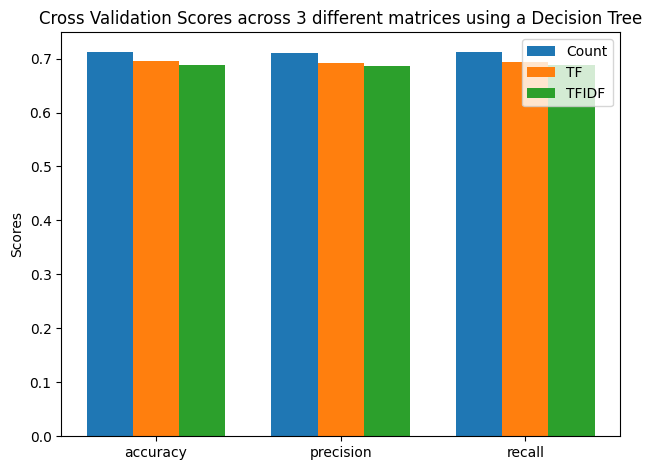

In [14]:

tmu.plot_avg_performance_for_3matrices(dt_clf, "Decision Tree", [baseline_count_matrix, baseline_tf_matrix, baseline_tfidf_matrix], ["Count", "TF", "TFIDF"], y)

In [ ]:
# Define the classifiers
clfs = [clf, dt_clf, KNN_clf]

# Define the names for the classifiers
clf_names = ["SVM", "DT", "KNN"]

# Call the function
tmu.plot_avg_performance_across_3clfs(clfs, clf_names, baseline_tfidf_matrix, "TFIDF", y)